# **Load Data**

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train_full.shape

(60000, 28, 28)

In [19]:
X_train_full[0][17]

array([  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
       159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
       246,   0], dtype=uint8)

In [23]:
pd.Series(y_train_full).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

# **Create Validation Set and Scale pixel values between 0-1**




In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat", "Sandal", "Shirt","Sneaker", "Bag","Ankle boot"]

In [5]:
y_train[0]

4

# **Creating the MLP model**

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(250,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(50,activation="softmax"))
model.add(keras.layers.Dense(10,activation="softmax"))

# model overview
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 100)               25100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 548,410
Trainable params: 548,410
Non-tr

In [7]:
from keras.utils.vis_utils import plot_model

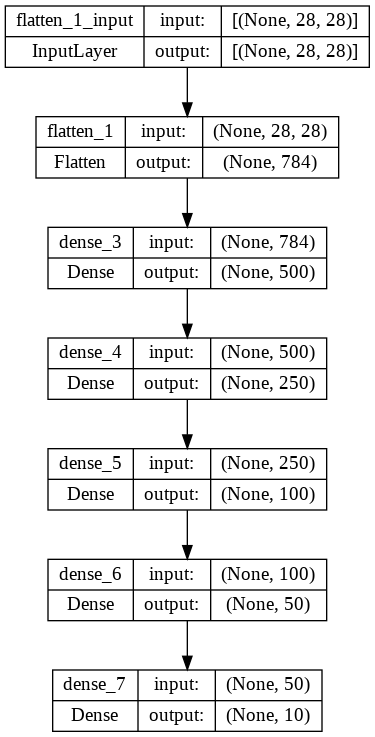

In [25]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

# **Compiling the model**

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

# **Training**

In [30]:
history = model.fit(X_train, y_train, epochs = 40,validation_data = (X_valid,y_valid))

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3022 - accuracy: 0.4756 - val_loss: 1.3121 - val_accuracy: 0.4998
Epoch 2/40
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2934 - accuracy: 0.4817 - val_loss: 1.3085 - val_accuracy: 0.4814
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2842 - accuracy: 0.4763 - val_loss: 1.2996 - val_accuracy: 0.4900
Epoch 4/40
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2703 - accuracy: 0.4895 - val_loss: 1.2777 - val_accuracy: 0.4964
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2547 - accuracy: 0.4865 - val_loss: 1.2616 - val_accuracy: 0.4930
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2354 - accuracy: 0.4977 - val_loss: 1.2351 - val_accuracy: 0.5060
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2116 - accuracy: 0.5028 - val_loss: 1.2114 - val_accuracy:

# **Plot the Learning Curves**

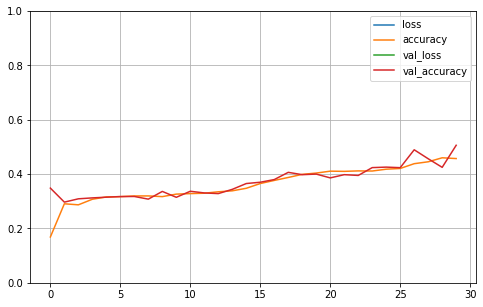

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid("True")
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5807 - accuracy: 0.2982


[1.5806671380996704, 0.29820001125335693]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 70ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 17ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')